# 1. 네트워크 빌드 및 학습
## 1.1 데이터 로드

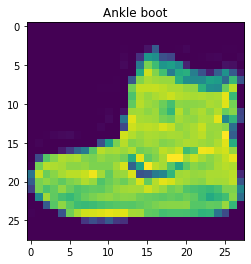

In [1]:
import tensorflow.keras as k
import matplotlib.pyplot as plt

clo_img = k.datasets.fashion_mnist
(clo_train_x, clo_train_y), (clo_test_x, clo_test_y) = clo_img.load_data()

clo_label = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.title(clo_label[clo_train_y[0]])
plt.imshow(clo_train_x[0])
plt.show()

## 1.2 네트워크 빌드

In [2]:
model = k.Sequential([
    k.layers.Flatten(input_shape=(28, 28)),
    k.layers.Dense(128, activation='relu'),
    k.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 1.3 네트워크 학습 및 검증

In [3]:
model.fit(clo_train_x, clo_train_y, epochs=5)

Epoch 1/5


InternalError:  Blas GEMM launch failed : a.shape=(32, 784), b.shape=(784, 128), m=32, n=128, k=784
	 [[node sequential/dense/MatMul (defined at <ipython-input-3-7cd1c9951142>:1) ]] [Op:__inference_train_function_541]

Function call stack:
train_function


In [ ]:
import numpy as np

test_x_ = clo_test_x[0:2]
test_y_ = clo_test_y[0:2]

predictions = model.predict(test_x_)
for i, prediction in enumerate(predictions):
    print(f'NetOut {np.argmax(prediction)}, 정답: {test_y_[i]}')